In [1]:
import pandas as pd
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.stats as stats
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./data/Train_Fix.csv")

In [3]:
df.loc[df['next_month_plan'] == 'PKG1', 'next_month_plan'] = 1
df.loc[df['next_month_plan'] == 'PKG2', 'next_month_plan'] = 2
df.loc[df['next_month_plan'] == 'PKG3', 'next_month_plan'] = 3
df.loc[df['next_month_plan'] == 'PKG4', 'next_month_plan'] = 4
df.loc[df['next_month_plan'] == 'PKG5', 'next_month_plan'] = 5
df.loc[df['next_month_plan'] == 'PKG6', 'next_month_plan'] = 6
df.loc[df['next_month_plan'] == 'PKG7', 'next_month_plan'] = 7
df.loc[df['next_month_plan'] == 'PKG8', 'next_month_plan'] = 8

df['device_type'] = pd.factorize(df['device_type'],na_sentinel=None)[0]
df['device_category'] = pd.factorize(df['device_category'],na_sentinel=None)[0]
df['gender'] = pd.factorize(df['gender'],na_sentinel=None)[0]
df['district_name'] = pd.factorize(df['district_name'],na_sentinel=None)[0]
df['age_group'] = pd.factorize(df['age_group'],na_sentinel=None)[0]

In [4]:
df = df.dropna(axis=1)
train_df = df.drop(['next_month_plan'],axis=1)
train_df = df.drop(df.columns.difference([
 'network_stay',
 'average_monthly_bill_amount',
 'dusage_sum',
 'dusage_max',
 'dusage_stddev',
 'vusage_offnet_max',
 'vusage_offnet_days',
 'vusage_offnet_stddev']), 1)

X = train_df.to_numpy()
Y = df['next_month_plan']
Y = Y.to_numpy()
Y = Y.astype('int')

In [5]:
train_df

,network_stay,average_monthly_bill_amount,dusage_sum,dusage_max,dusage_stddev,vusage_offnet_max,vusage_offnet_days,vusage_offnet_stddev
0,154,822.94,6131.0,1529.399115,295.490554,1.700000,8.0,0.376370
1,71,917.70,5571.0,485.940130,151.726243,0.000000,0.0,0.000000
2,17,464.44,33.0,1.254282,0.057480,0.000000,0.0,0.000000
3,273,3103.37,322.0,69.185369,14.813802,26.766667,24.0,6.980959
4,105,1059.65,1149.0,314.132696,91.951481,0.400000,1.0,0.085280
...,...,...,...,...,...,...,...,...
8778,16,4235.68,54612.0,8601.590596,2336.393994,0.000000,0.0,0.000000
8779,156,5459.93,14345.0,1149.832257,199.152430,0.000000,0.0,0.000000
8780,103,5084.35,5264.0,788.623732,181.664827,0.000000,0.0,0.000000
8781,104,4736.81,39754.0,2137.252754,413.620485,84.150000,28.0,22.382162


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.33, random_state=42)

y_train = y_train - 1
y_test = y_test -1

In [7]:
features = df.columns

In [8]:
features = features.drop(['next_month_plan'])
features

Index(['primary_identifier', 'device_type', 'device_category', 'gender',
       'district_name', 'age_group', 'network_stay',
       'average_monthly_bill_amount', 'dusage_sum', 'dusage_min', 'dusage_max',
       'dusage_avg', 'dusage_days', 'dusage_stddev', 'vusage_onnet_sum',
       'vusage_onnet_max', 'vusage_onnet_min', 'vusage_onnet_days',
       'vusage_onnet_avg', 'vusage_onnet_stddev', 'vusage_offnet_sum',
       'vusage_offnet_max', 'vusage_offnet_min', 'vusage_offnet_days',
       'vusage_offnet_avg', 'vusage_offnet_stddev',
       'number_of_fixed_bb_accounts', 'number_of_iptv_accounts'],
      dtype='object')

In [9]:
features = features.to_numpy()

In [117]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X, Y)

RandomForestClassifier(random_state=0)

In [118]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.040 seconds


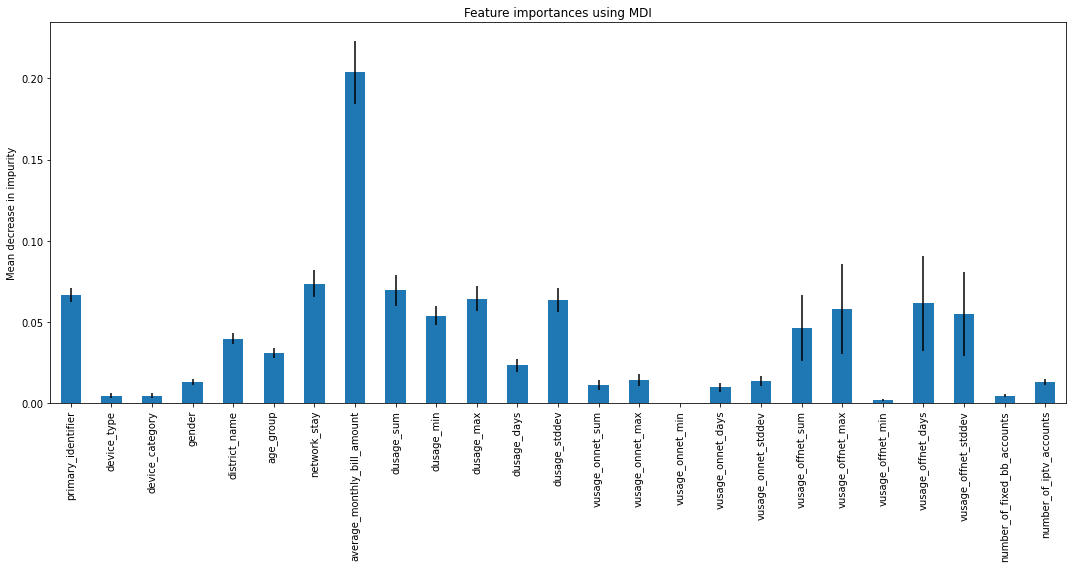

In [119]:
forest_importances = pd.Series(importances, index=features)
plt.rcParams["figure.figsize"] = (15,8)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [120]:
forest_importances

primary_identifier             0.066486
device_type                    0.004699
device_category                0.004653
gender                         0.013192
district_name                  0.039792
age_group                      0.030865
network_stay                   0.073595
average_monthly_bill_amount    0.203653
dusage_sum                     0.069626
dusage_min                     0.053883
dusage_max                     0.064423
dusage_days                    0.023387
dusage_stddev                  0.063552
vusage_onnet_sum               0.011125
vusage_onnet_max               0.014105
vusage_onnet_min               0.000000
vusage_onnet_days              0.009803
vusage_onnet_stddev            0.013527
vusage_offnet_sum              0.046100
vusage_offnet_max              0.057869
vusage_offnet_min              0.001772
vusage_offnet_days             0.061456
vusage_offnet_stddev           0.054949
number_of_fixed_bb_accounts    0.004655
number_of_iptv_accounts        0.012833


In [83]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X, Y, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=features)

Elapsed time to compute the importances: 34.307 seconds


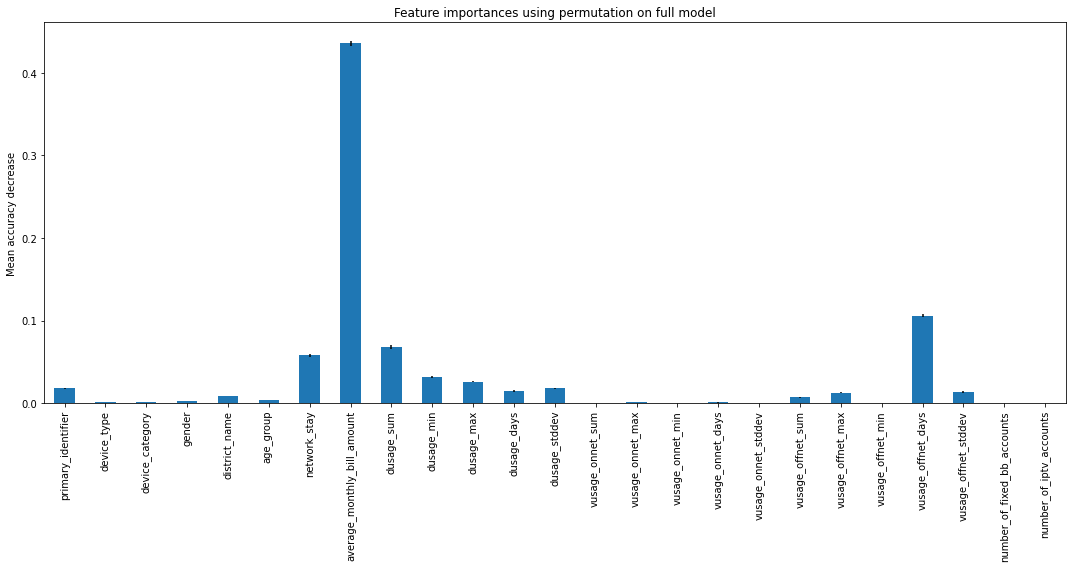

In [84]:
plt.rcParams["figure.figsize"] = (15,8)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [86]:
model.fit(X,Y)

ExtraTreesClassifier()

In [87]:
feature_importance = pd.Series(model.feature_importances_,index = features)

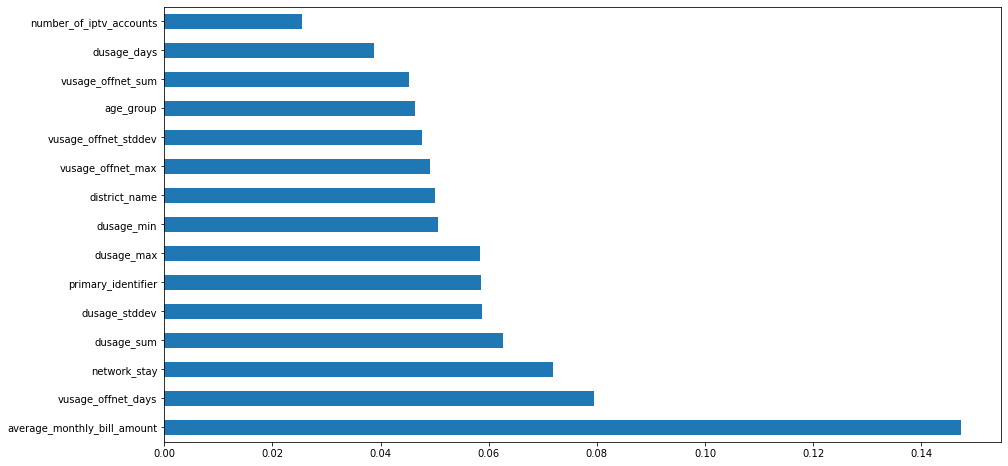

In [90]:
feature_importance.nlargest(15).plot(kind='barh')
plt.show()

# Using All Columns

In [99]:
df = pd.read_csv("./data/train_dataset.csv")

In [100]:
df.loc[df['next_month_plan'] == 'PKG1', 'next_month_plan'] = 1
df.loc[df['next_month_plan'] == 'PKG2', 'next_month_plan'] = 2
df.loc[df['next_month_plan'] == 'PKG3', 'next_month_plan'] = 3
df.loc[df['next_month_plan'] == 'PKG4', 'next_month_plan'] = 4
df.loc[df['next_month_plan'] == 'PKG5', 'next_month_plan'] = 5
df.loc[df['next_month_plan'] == 'PKG6', 'next_month_plan'] = 6
df.loc[df['next_month_plan'] == 'PKG7', 'next_month_plan'] = 7
df.loc[df['next_month_plan'] == 'PKG8', 'next_month_plan'] = 8

df['device_type'] = pd.factorize(df['device_type'],na_sentinel=None)[0]
df['device_category'] = pd.factorize(df['device_category'],na_sentinel=None)[0]
df['gender'] = pd.factorize(df['gender'],na_sentinel=None)[0]
df['district_name'] = pd.factorize(df['district_name'],na_sentinel=None)[0]
df['age_group'] = pd.factorize(df['age_group'],na_sentinel=None)[0]

In [101]:
df = df.dropna(axis=0)
train_df = df.drop(['next_month_plan'],axis=1)
X = train_df.to_numpy()
Y = df['next_month_plan']
Y = Y.to_numpy()
Y = Y.astype('int')

In [102]:
features = df.columns

In [103]:
features = features.drop(['next_month_plan'])

In [104]:
features = features.to_numpy()

In [105]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X, Y)

RandomForestClassifier(random_state=0)

In [106]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.012 seconds


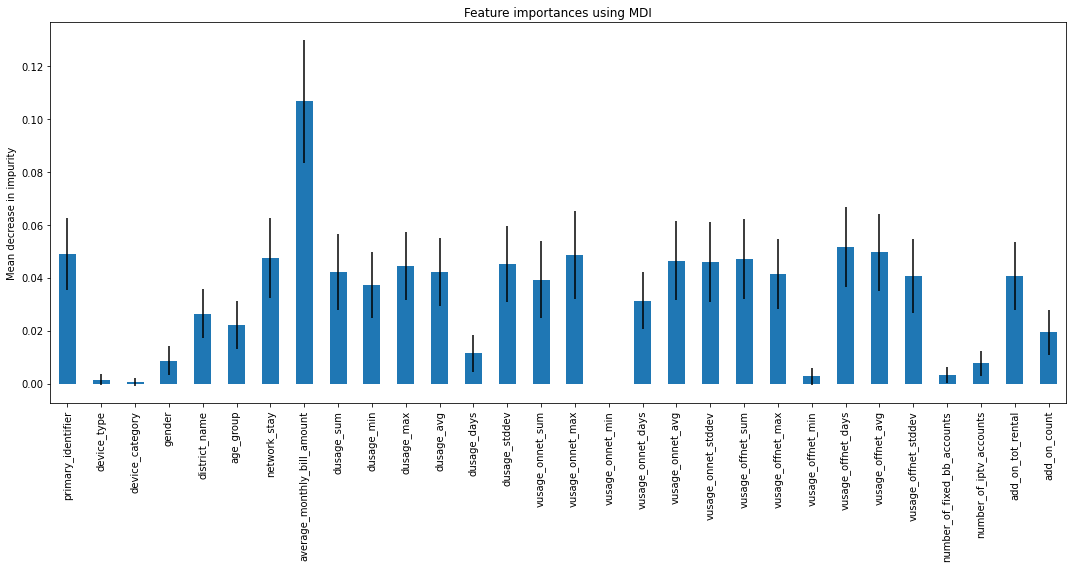

In [107]:
forest_importances = pd.Series(importances, index=features)
plt.rcParams["figure.figsize"] = (15,8)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [108]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X, Y, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=features)

Elapsed time to compute the importances: 5.023 seconds


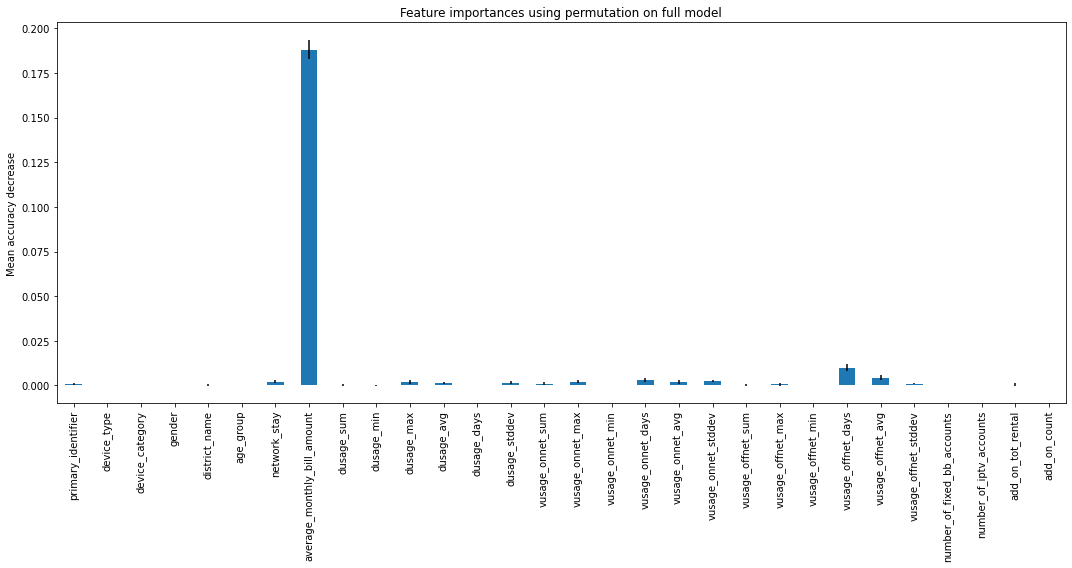

In [109]:
plt.rcParams["figure.figsize"] = (15,8)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [131]:
df = pd.read_csv("./data/train_dataset.csv")

In [132]:
for i in range(len(df)):
    Sum_dusage = df.iloc[i]['dusage_sum']
    days_dusage = df.iloc[i]['dusage_days']
    
    avg_dusage = Sum_dusage/days_dusage if days_dusage>0 else 0
    
    Sum_vusage_onnet = df.iloc[i]['vusage_onnet_sum']
    days_vusage_onnet = df.iloc[i]['vusage_onnet_days']
    
    avg_vusage_onnet = Sum_vusage_onnet/days_vusage_onnet if days_vusage_onnet>0 else 0
    
    Sum_vusage_offnet = df.iloc[i]['vusage_offnet_sum']
    days_vusage_offnet = df.iloc[i]['vusage_offnet_days']
    
    avg_vusage_offnet = Sum_vusage_offnet/days_vusage_offnet if days_vusage_offnet>0 else 0
    
    df.loc[i,'dusage_avg'] = avg_dusage
    df.loc[i,'vusage_onnet_avg'] = avg_vusage_onnet
    df.loc[i,'vusage_offnet_avg'] = avg_vusage_offnet
    

In [137]:
df.isnull().sum()

primary_identifier                0
device_type                      23
device_category                  30
gender                          135
district_name                     0
age_group                       135
network_stay                      0
average_monthly_bill_amount       0
dusage_sum                        0
dusage_min                        0
dusage_max                        0
dusage_avg                        0
dusage_days                       0
dusage_stddev                     0
vusage_onnet_sum                  0
vusage_onnet_max                  0
vusage_onnet_min                  0
vusage_onnet_days                 0
vusage_onnet_avg                  0
vusage_onnet_stddev               0
vusage_offnet_sum                 0
vusage_offnet_max                 0
vusage_offnet_min                 0
vusage_offnet_days                0
vusage_offnet_avg                 0
vusage_offnet_stddev              0
number_of_fixed_bb_accounts       0
number_of_iptv_accounts     

In [140]:
df.to_csv("processed_train_dataset.csv", encoding='utf-8', index=False)

# Boruta

In [27]:
from boruta import BorutaPy

In [28]:
forest = RandomForestClassifier(random_state=0)

In [29]:
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1,max_iter=500)
feat_selector.fit(X, Y)

Iteration: 	1 / 500
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	2 / 500
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	3 / 500
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	4 / 500
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	5 / 500
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	6 / 500
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	7 / 500
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	8 / 500
Confirmed: 	8
Tentative: 	2
Rejected: 	15
Iteration: 	9 / 500
Confirmed: 	8
Tentative: 	2
Rejected: 	15
Iteration: 	10 / 500
Confirmed: 	8
Tentative: 	2
Rejected: 	15
Iteration: 	11 / 500
Confirmed: 	8
Tentative: 	2
Rejected: 	15
Iteration: 	12 / 500
Confirmed: 	8
Tentative: 	2
Rejected: 	15
Iteration: 	13 / 500
Confirmed: 	8
Tentative: 	2
Rejected: 	15
Iteration: 	14 / 500
Confirmed: 	8
Tentative: 	2
Rejected: 	15
Iteration: 	15 / 500
Confirmed: 	8
Tentative: 	2
Rejected: 	15
Iteration: 	16 / 500
Confirmed: 	8
Tentative: 	2
Rejected: 	15
I

Iteration: 	131 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	132 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	133 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	134 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	135 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	136 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	137 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	138 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	139 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	140 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	141 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	142 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	143 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	144 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	145 / 500
Confirmed: 	8
Tentative: 	1
Rejected: 	16
Iteration: 	146 / 500
Confirmed: 	8
Tent

BorutaPy(estimator=RandomForestClassifier(n_estimators=42,
                                          random_state=RandomState(MT19937) at 0x14596614EB8),
         max_iter=500, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x14596614EB8, verbose=2)

In [30]:
feat_selector.support_

# check ranking of features
feat_selector.ranking_

array([ 1, 13, 14, 11,  4,  5,  1,  1,  1,  3,  1,  6,  1,  9,  8, 17, 10,
        7,  2,  1, 16,  1,  1, 15, 12])

In [31]:
X_filtered = feat_selector.transform(X)

In [32]:
feat_selector.support_

array([ True, False, False, False, False, False,  True,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False,  True,  True, False, False])

In [24]:
features

array(['primary_identifier', 'device_type', 'device_category', 'gender',
       'district_name', 'age_group', 'network_stay',
       'average_monthly_bill_amount', 'dusage_sum', 'dusage_min',
       'dusage_max', 'dusage_days', 'dusage_stddev', 'vusage_onnet_sum',
       'vusage_onnet_max', 'vusage_onnet_min', 'vusage_onnet_days',
       'vusage_onnet_stddev', 'vusage_offnet_sum', 'vusage_offnet_max',
       'vusage_offnet_min', 'vusage_offnet_days', 'vusage_offnet_stddev',
       'number_of_fixed_bb_accounts', 'number_of_iptv_accounts'],
      dtype=object)

In [33]:
selected_features = []
for i,j in zip(features,feat_selector.support_):
    if j==True:
        selected_features.append(i)

In [26]:
selected_features

['network_stay',
 'average_monthly_bill_amount',
 'dusage_sum',
 'dusage_max',
 'dusage_stddev',
 'vusage_offnet_max',
 'vusage_offnet_days',
 'vusage_offnet_stddev']

In [34]:
selected_features

['primary_identifier',
 'network_stay',
 'average_monthly_bill_amount',
 'dusage_sum',
 'dusage_max',
 'dusage_stddev',
 'vusage_offnet_max',
 'vusage_offnet_days',
 'vusage_offnet_stddev']

# XGBoost

In [188]:
import xgboost as xgb

In [189]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [190]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax','num_class':'8'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [191]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [195]:
num_round = 40
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.79434	train-auc:0.80394
[1]	eval-auc:0.83054	train-auc:0.83585
[2]	eval-auc:0.83841	train-auc:0.84592
[3]	eval-auc:0.84178	train-auc:0.85119
[4]	eval-auc:0.84358	train-auc:0.85528
[5]	eval-auc:0.84550	train-auc:0.85852
[6]	eval-auc:0.84684	train-auc:0.86123
[7]	eval-auc:0.84667	train-auc:0.86387
[8]	eval-auc:0.84725	train-auc:0.86535
[9]	eval-auc:0.84804	train-auc:0.86764
[10]	eval-auc:0.84743	train-auc:0.86931
[11]	eval-auc:0.84810	train-auc:0.87147
[12]	eval-auc:0.84795	train-auc:0.87330
[13]	eval-auc:0.84826	train-auc:0.87497
[14]	eval-auc:0.84849	train-auc:0.87616
[15]	eval-auc:0.84815	train-auc:0.87729
[16]	eval-auc:0.84836	train-auc:0.87857
[17]	eval-auc:0.84797	train-auc:0.87949
[18]	eval-auc:0.84756	train-auc:0.88074
[19]	eval-auc:0.84750	train-auc:0.88186
[20]	eval-auc:0.84744	train-auc:0.88311
[21]	eval-auc:0.84788	train-auc:0.88435
[22]	eval-auc:0.84749	train-auc:0.88507
[23]	eval-auc:0.84706	train-auc:0.88588
[24]	eval-auc:0.84673	train-auc:0.88736
[25]	eval-

In [196]:
bst.save_model('8_features.model')

In [298]:
bst = xgb.Booster({'nthread': 4})  # init model
bst.load_model('8_features.model')  # load data

In [299]:
dtest = xgb.DMatrix(X)

In [300]:
ypred = bst.predict(dtest)

In [301]:
len(ypred)

4500

In [302]:
ypred

array([0., 0., 1., ..., 3., 0., 2.], dtype=float32)

In [303]:
ypred = ypred+1

In [304]:
type(ypred)

numpy.ndarray

In [305]:
df = pd.read_csv("./data/test_dataset.csv")

In [306]:
df = df['primary_identifier']

In [307]:
df

0       2003793
1       1776101
2       6945050
3       2472049
4       7197266
         ...   
4495    8830679
4496    3839728
4497    2166141
4498    9426198
4499    9114395
Name: primary_identifier, Length: 4500, dtype: int64

In [308]:
pred_df = pd.DataFrame(ypred, columns =['next_month_plan'])

In [309]:
print(pred_df)

      next_month_plan
0                 1.0
1                 1.0
2                 2.0
3                 1.0
4                 1.0
...               ...
4495              7.0
4496              3.0
4497              4.0
4498              1.0
4499              3.0

[4500 rows x 1 columns]


In [310]:
df_submission=pd.concat([df, pred_df], axis=1)

In [311]:
df_submission = df_submission.astype(int)

In [312]:
df_submission

,primary_identifier,next_month_plan
0,2003793,1
1,1776101,1
2,6945050,2
3,2472049,1
4,7197266,1
...,...,...
4495,8830679,7
4496,3839728,3
4497,2166141,4
4498,9426198,1


In [314]:
df_submission.to_csv("submission.csv", encoding='utf-8', index=False)

# NN

In [346]:
clf = MLPClassifier(hidden_layer_sizes=[100,100,64,32,100,112],random_state=1, max_iter=2000).fit(X_train, y_train)

In [347]:
pred = clf.predict(X_test)

In [348]:
r2_score(y_test,pred)

0.18064456998484968

In [10]:
# Import Support Vector Classifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
svc=SVC(probability=True)
forest = RandomForestClassifier(random_state=0)
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=100, base_estimator=forest,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",f1_score(y_test, y_pred,average='micro'))

Accuracy: 0.5112107623318386
